# AUTHOR: DEEPAK PAGADALA
## TASK 1: PREDICTION USING MACHINE LEARNING
The task is to predict the marks of a student based on the number of hours he/she studies. The machine learning alorithm used is Linear Regression as the dat consists of 2 variables.


dataset: http://bit.ly/w-data




# 1. IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. READING THE DATASET
Here the independent variable is "Hours" and the target variable is "Scores". The first 5 entries are checked to get an idea of the dataset, it can be concluded that the independent variable is of the type is floating point and target/dependent varible are integers.

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. DATA PREPROCESSING
Checking if any data is missing using the isna() function from the pandas library. The reason for this is, missing data can cause problems while creating the model.


In [3]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


# 4. DATA VISUALISATION
Visualising the given data in a plot using matplotlib library, this allows to us to identify the relationship between the 2 variables manually. 

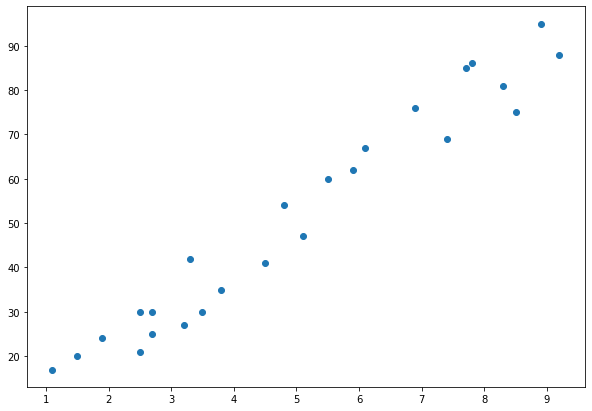

In [5]:
plt.figure(figsize=(10,7))
plt.scatter(df['Hours'],df['Scores'])

**The above plot clearly indicates that the data is linearly independent and the variables have positively correlation. So linear Regession is the best suited ML algorithm for prediction.**



# 5. DATA ANALYSIS


Importing train_test_split for splitting dataset into train dataset and test dataset.

In [6]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

Training the X_train dataset.

In [7]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression()  
LR.fit(X_train, y_train) 

print("Training complete.")

Training complete.


# 6. VISUALISING THE RESULTS
Plotting the linear regression line with both train and test data.

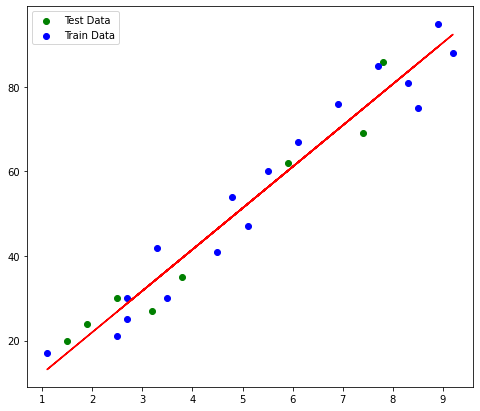

In [8]:
plt.figure(figsize = (8,7))
plt.scatter(X_test,y_test,color = 'green',label = 'Test Data')
plt.scatter(X_train,y_train,color = 'blue',label = 'Train Data')
plt.plot(X_train,LR.predict(X_train),color = 'red')
plt.legend()

According to the above plot the model has a good fit

Now, predicting the percentages of students based on the trained model. 

In [9]:
y_predicted=LR.predict(X_test)

comparing the predicted score and the actual score by creating a seperate dataframe.

In [10]:
# Comparing Actual vs Predicted
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  
df_pred

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


Based on the model we created, we can check the predicted score when a student studies  9.25 hrs.

#7. PREDICTION

In [11]:
hours = [[9.25]]
own_pred = LR.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


According to the model created, a student would get a score of 92.9 when he/she studies for 9.25 hours

Evaluation of the model is necessary because it helps understand how well the data fits into the model. R sqaure is a method to evaluate the model. higher the value of R sqaure, better fitting of the model.

In [12]:
print("R sq:",LR.score(X_test,y_test))

R sq: 0.9568211104435257


**This indicates that, 95.6% of the data is properly fit into the model and thats a good score.**